10 1959
10 1602
0.3333333333333333
(14, 3) (6, 1959)


Text(0, 0.5, '두번째 주성분')

/Users/tmp/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52395 (\N{HANGUL SYLLABLE CEOS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tmp/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tmp/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tmp/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tmp/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.

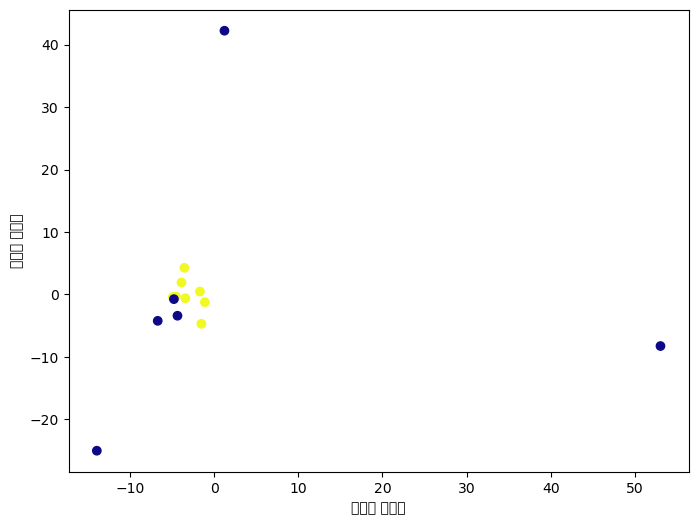

In [162]:
import numpy as np
import re
import pandas as pd
import glob
import codecs
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

t_path = '/Users/tmp/Desktop/viral_model/data_set_all/data_test_ture'

f_path = '/Users/tmp/Desktop/viral_model/data_set_all/data_test_false'


true_list = []
false_list = []

true_path = glob.glob(t_path + '/*.txt')
false_path = glob.glob(f_path + '/*.txt')

# 파일 꺼내서 불러오기 list 에 저장

for file in range(len(true_path)):
    with codecs.open(true_path[file], 'r', encoding = 'utf-8',
                     errors = 'igonore') as f:
        open_text = f.read()
        open_text = re.sub('[\n\r\t0-9\-\x0c❸ⓒ•a-zA-Z"“‘>]', "",
                    str(open_text.strip()))
        true_list.append(open_text)
        


        
for file in range(len(false_path)):
    with codecs.open(false_path[file], 'r', encoding = 'utf-8',
                     errors = 'igonore') as f:
        open_text = f.read()
        open_text = re.sub('[\n\r\t0-9\-\x0c❸ⓒ•a-zA-Z"“‘>]', "",
                    str(open_text.strip()))
#         open_text = open_text.split('.')
        false_list.append(open_text)
        
        

        
# 데이터 전처리 

import konlpy
from konlpy.tag import Okt
t = Okt()

# 형태소 나누기

true_token = [t.morphs(row) for row in true_list]
false_token = [t.morphs(row) for row in false_list]

# 토큰을 한 문장으로 붙이기

true_sentence = []
false_sentence = []


for content in true_token:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    true_sentence.append(sentence)
    

for content in false_token:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    false_sentence.append(sentence)
    
    
# 벡터화

vectorizer = TfidfVectorizer(min_df=1, decode_error = 'ignore')

true = vectorizer.fit_transform(true_sentence)
num_true, num_features = true.shape
print(num_true, num_features)


# print(false[2])

false = vectorizer.fit_transform(false_sentence)
num_false, num_features = false.shape
print(num_false, num_features)



# svm 적용

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from scipy import sparse

from sklearn.preprocessing import StandardScaler, MinMaxScaler


target = [0]*10 + [1]*10







true = true.toarray(order=None, out = None)
false = false.toarray(order = None, out = None)

true = np.array(true)
false = np.array(false)

# 어쩔 수 없이 패딩함 ㅠㅠ
false = np.pad(false, pad_width = ((0,0),(0,357)), mode = 'constant', constant_values=0)
data = np.vstack((true,false))

x_train, x_test, y_train,y_test = train_test_split(data,target, test_size = 0.3, random_state = 42)

from sklearn.metrics import confusion_matrix, accuracy_score

pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

x_train = pipeline.fit_transform(x_train)
x_test = pipeline.transform(x_test)


model = SVC(kernel = 'rbf', gamma = 1, C = 0.01)

model.fit(x_train,y_train)    

y_pred = model.predict(x_test)
confusion_matrix(y_pred, y_test)
print(accuracy_score(y_pred,y_test))




from sklearn.model_selection import GridSearchCV

# param_grid = {'C': [0.01,0.1,0.5,1,10,100],
#              'gamma': [1,0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
#              'kernel' : ['rbf','poly''linear']}


# grid = GridSearchCV(SVC(), param_grid = param_grid, cv = 5, refit = True, verbose = 1)


              
# grid.fit(x_train,y_train)
              
# grid.best_params_



# 데이터 스케일링 

x_train, x_test, y_train, y_test = train_test_split(data,target, test_size = 0.3, random_state = 42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.decomposition import PCA

pca = PCA(n_components=3)

x_train2 = pca.fit_transform(x_train) # z1,z2,z3
x_test2 = pca.fit_transform(x_test)

print(x_train2.shape, x_test.shape)

pca = PCA()
PCscore_train = pca.fit_transform(x_train)
PCscore_test = pca.transform(x_test)

eigen_value = pca.explained_variance_
eigen_value.shape

eigen_vector = pca.components_.transpose()
eigen_vector.shape

np.dot(x_train,eigen_vector)

PCscore_train

eigen_value = pca.explained_variance_
choose = []

for i in eigen_value:
    a = i/np.sum(eigen_value)
    choose.append(a)
    
choose


plt.figure(figsize = (8,6))
plt.scatter(x_train2[:,0],x_train2[:,1], c=y_train, cmap = 'plasma')
plt.xlabel('첫번째 주성분')
plt.ylabel('두번째 주성분')

